In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df=pd.read_csv('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
#overview of the dataset
df.info

<bound method DataFrame.info of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [4]:
#look for inconsistiencies in the dataset-empty cells
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
#Convert the 'Date' column to datetime format
df['date']=pd.to_datetime(df['Date'])
df.info

C:\Users\Admin\AppData\Local\Temp\ipykernel_18880\2301342593.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date']=pd.to_datetime(df['Date'])


<bound method DataFrame.info of        Member_number        Date        itemDescription       date
0               1808  21-07-2015         tropical fruit 2015-07-21
1               2552  05-01-2015             whole milk 2015-01-05
2               2300  19-09-2015              pip fruit 2015-09-19
3               1187  12-12-2015       other vegetables 2015-12-12
4               3037  01-02-2015             whole milk 2015-02-01
...              ...         ...                    ...        ...
38760           4471  08-10-2014          sliced cheese 2014-10-08
38761           2022  23-02-2014                  candy 2014-02-23
38762           1097  16-04-2014               cake bar 2014-04-16
38763           1510  03-12-2014  fruit/vegetable juice 2014-12-03
38764           1521  26-12-2014               cat food 2014-12-26

[38765 rows x 4 columns]>

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


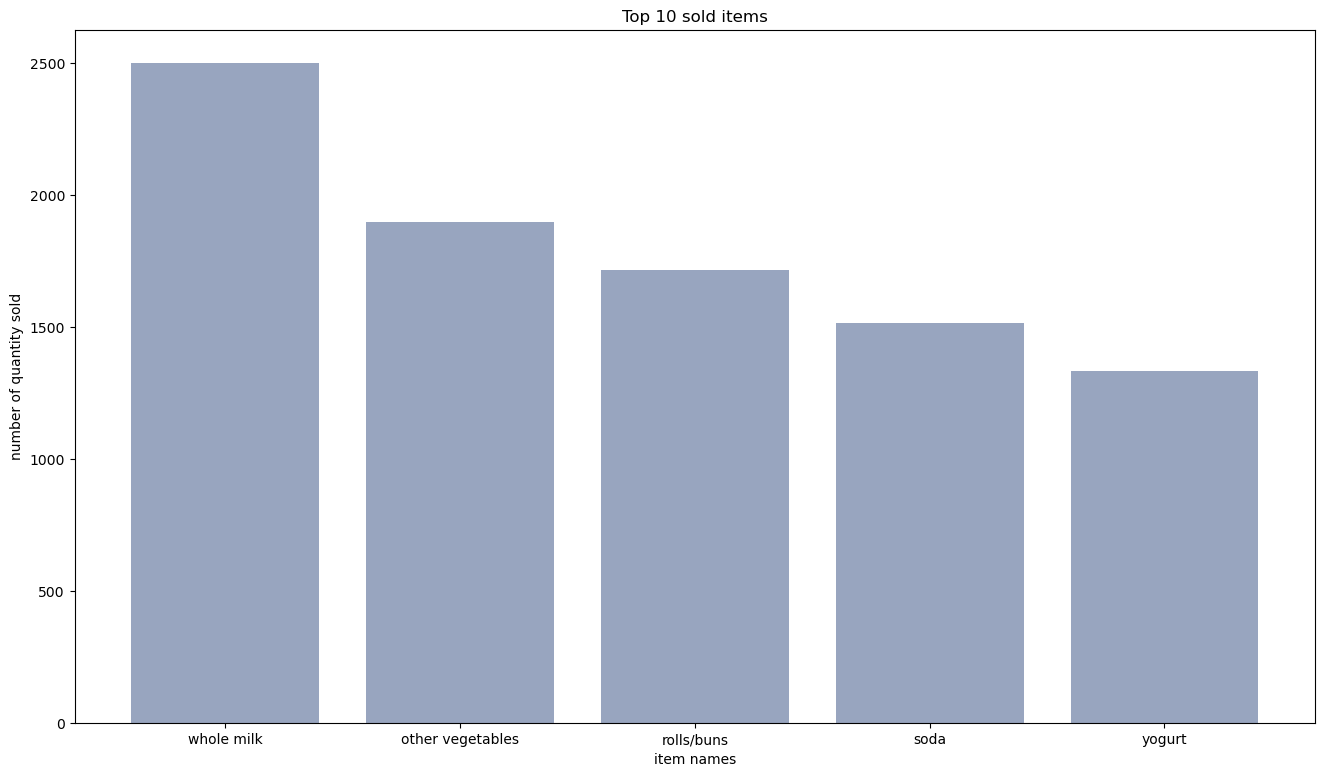

In [9]:
#Group the dataset by 'itemDescription' and count the occurrences of each item
# This gives the total frequency (number of times sold) for each unique item
#Sort the items by frequency in descending order 
item_distr = df.groupby(by='itemDescription').size().reset_index(name = 'Frequency').sort_values(by = 'Frequency',ascending=False).head()

#Extract item names and their corresponding frequencies for plotting
bars=item_distr['itemDescription']
height=item_distr['Frequency']
x_pos=np.arange(len(bars))

#Plot a bar chart showing the most frequently sold items
plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))
plt.title('Top 10 sold items')
plt.xlabel('item names')
plt.ylabel('number of quantity sold')

plt.xticks(x_pos,bars)
plt.show()

In [8]:
df_date=df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk
...,...,...
08-10-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


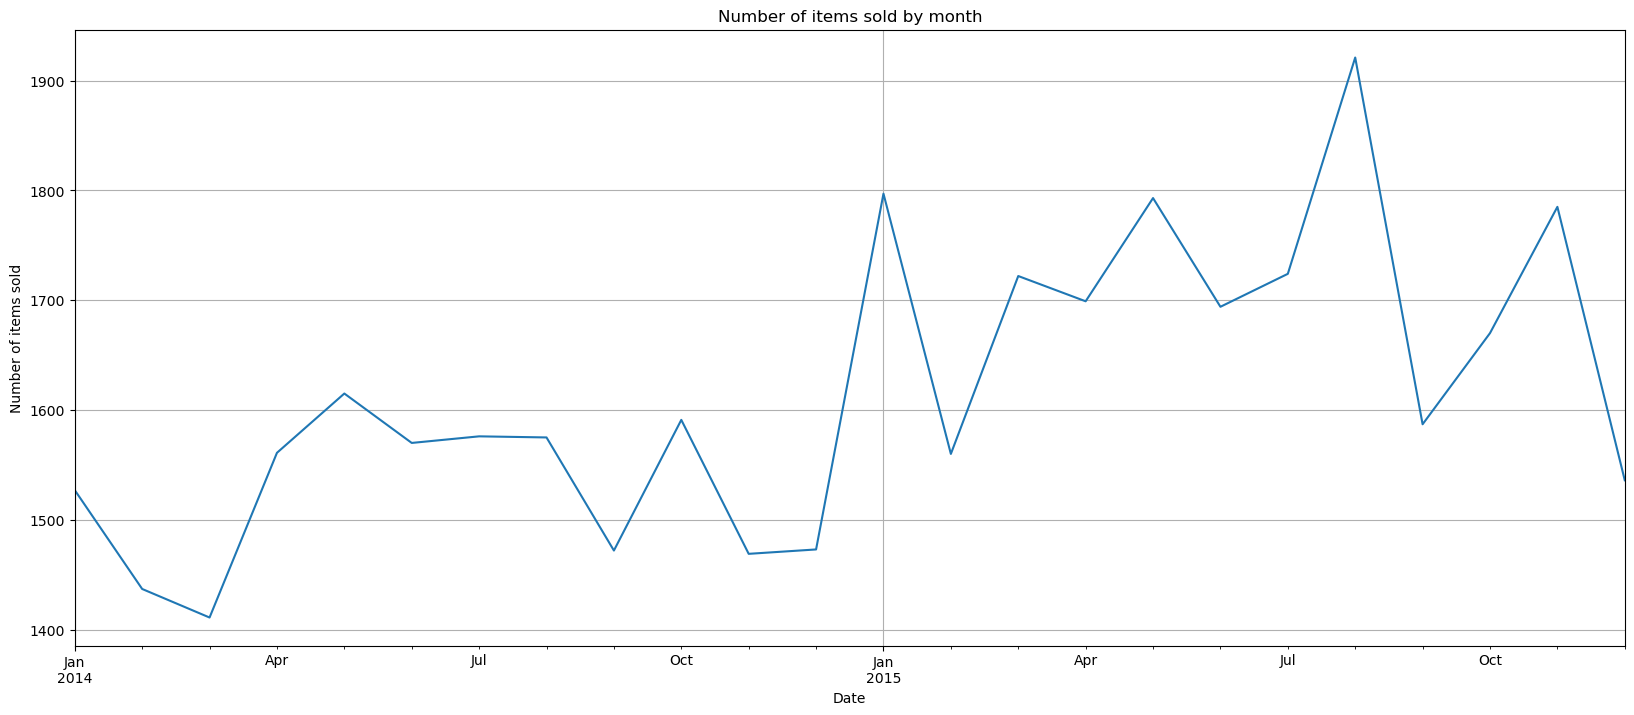

In [21]:
# Convert and set index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Plot number of items sold per month
df.resample('M')['itemDescription'].count().plot(
    figsize=(20, 8),
    grid=True,
    title='Number of items sold by month'
).set(xlabel='Date', ylabel='Number of items sold')

plt.show()



In [22]:
#Select only the 'Member_number' and 'itemDescription' columns.
#This prepares a simplified dataset focused on customer-item interactions

cust_level=df[['Member_number','itemDescription']].sort_values(by='Member_number',ascending=False)

#Remove any leading/trailing spaces from item descriptions
# This is crucial to ensure consistent formatting of item names, especially before grouping or counting
cust_level['itemDescription']=cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
Date,,
2015-02-10,5000,soda
2015-02-10,5000,semi-finished bread
2014-03-09,5000,fruit/vegetable juice
2014-11-16,5000,bottled beer
2015-02-10,5000,root vegetables
...,...,...
2014-06-24,1000,whole milk
2015-05-27,1000,pickled vegetables
2015-11-25,1000,sausage


In [23]:
#Group the customer-level DataFrame by 'Member_number'.This groups all purchases made by each individual customer
#Store all these transactions (lists of items) in a single list called 'transactions'
transactions=[a[1]['itemDescription'].tolist()for a in list(cust_level.groupby(['Member_number']))]

In [26]:
!pip install apyori


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=e1e673d045caa4460f40aca4aa316345c4726045a895ebac74891528336ac9c9
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\77\3d\a6\d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [27]:
# Run the Apriori algorithm on the transaction list
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0.002,min_confidence=0.05,min_lift=3,min_length=2)
# - min_support=0.002: itemsets must appear in at least 0.2% of transactions
# - min_confidence=0.05: rules must have at least 5% confidence
# - min_lift=3: rules must have a lift greater than 3 (stronger association)
# - min_length=2: consider only rules involving at least 2 items
results=list(rules) # Convert the generator object returned by apriori into a list for easier processing
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [30]:
def inspect(results):
    lhs = [tuple(rule.ordered_statistics[0].items_base) for rule in results]  # Extract the left-hand side (base itemset) of each rule
    rhs = [tuple(rule.ordered_statistics[0].items_add) for rule in results]  # Extract the right-hand side (added itemset) of each rule
    supports = [rule.support for rule in results] # Extract the support value of each rule (frequency in the dataset)
    confidences = [rule.ordered_statistics[0].confidence for rule in results]# Extract the confidence of each rule (likelihood of RHS given LHS)
    lifts = [rule.ordered_statistics[0].lift for rule in results] # Extract the lift of each rule (strength of the rule compared to random chance)
    return list(zip(lhs, rhs, supports, confidences, lifts)) # Return a list of tuples containing all the extracted metrics

# Convert to DataFrame
results_in_dataframe = pd.DataFrame(
    inspect(results),
    columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift']
)

# Show top 10 rules by Lift
results_in_dataframe.nlargest(n=10, columns='Lift')


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4915,"(bottled water, berries)","(pork, yogurt, pip fruit, other vegetables)",0.002052,0.105263,14.654135
4914,"(bottled water, berries)","(pork, other vegetables, pip fruit, whole milk)",0.002052,0.105263,12.068111
2674,"(beef, oil)","(pork, other vegetables, soda)",0.002052,0.242424,11.524021
3573,"(brown bread, citrus fruit)","(soda, specialty chocolate, yogurt)",0.002052,0.073394,11.443670
4133,"(citrus fruit, long life bakery product)","(rolls/buns, meat, whole milk)",0.002052,0.148148,11.105413
3290,"(bottled water, oil)","(soda, sausage, citrus fruit)",0.002052,0.150943,10.322410
2904,"(brown bread, bottled beer)","(rolls/buns, other vegetables, misc. beverages)",0.002309,0.097826,9.533152
5045,"(meat, bottled water)","(soda, other vegetables, pastry, whole milk)",0.002052,0.135593,9.438257
2902,"(brown bread, bottled beer)","(root vegetables, domestic eggs, pastry)",0.002052,0.086957,9.415459
2734,"(bottled water, berries)","(brown bread, soda, shopping bags)",0.002309,0.118421,9.232105


### Deducing the results:

* **Left Hand Side (LHS)**: The items a customer buys initially.
* **Right Hand Side (RHS)**: Items likely to be bought together with LHS items.
* **Support**: How frequently this rule appears in the dataset.
* **Confidence**: How often RHS appears in transactions that contain LHS.
* **Lift**: Strength of the association. Lift > 1 indicates a positive correlation. Higher values = stronger relationships.

### Taking the first row
*  **Right Hand Side**: (pork, yogurt, pip fruit, other vegetables)
*  **Support**: 0.002052
*  **Confidence**: 0.105263
*  **Lift**: 14.654135

### Interpretation:

* **Rule**: If a customer buys *bottled water* and *berries*, they are also likely to buy *pork*, *yogurt*, *pip fruit*, and *other vegetables*.
* **Support** = 0.002052: This rule applies to 0.205% of all transactions. It’s relatively rare but noteworthy.
* **Confidence** = 0.105263: About 10.5% of the customers who bought bottled water and berries also bought those 4 items.
* **Lift** = 14.65: This rule is 14.65 times more likely to occur than if those RHS items were bought independently. This is a very strong association.



###  Key Insights from the Top 10 Rules:

| Row  | Rule Summary                                                  | Confidence | Lift  | Insight                                       |
| ---- | ------------------------------------------------------------- | ---------- | ----- | --------------------------------------------- |
| 4915 | Bottled water + berries → pork + yogurt + pip fruit + veggies | 10.5%      | 14.65 | Very strong multi-item basket combo           |
| 2674 | Beef + oil → pork + veggies + soda                            | 24.2%      | 11.52 | High confidence and strong lift — strong rule |
| 3573 | Brown bread + citrus → soda + chocolate + yogurt              | 7.3%       | 11.44 | Likely a snack or breakfast combo             |
| 5045 | Meat + water → soda + veggies + pastry + milk                 | 13.5%      | 9.44  | Suggests a full meal purchase pattern         |
| 2734 | Water + berries → brown bread + soda + shopping bags          | 11.8%      | 9.23  | Suggests packaging + meal prep behavior       |

---

###  Conclusions:

* **Bottled water** is a frequent component in strong rules — potentially a key basket driver.
* **High lift values** (>10) demonstrate non-random purchase patterns, ideal for promotions, product placements, or combo deals.
* Certain pairings (e.g., *brown bread* + *citrus fruit*) may suggest common routines like **breakfast shopping**.




### Recommendations Based on Apriori Association Rules

After analyzing the shopping behavior data using the Apriori algorithm, here are some practical and actionable suggestions that can help improve sales, customer experience, and overall store performance.

1. Make Smart Product Placements

**What stood out**: Bottled water often shows up in strong item combinations.

**Possible actions**: Place bottled water near items like berries, yogurt, and pork to encourage customers to pick them up together.

Consider grouping common breakfast items (like brown bread, citrus fruit, and yogurt) in the same aisle or display — it makes it easier for customers to grab everything in one go.

2.Create Targeted Promotions and Combos

**What stood out**: Some item groupings are very predictable — they go hand in hand.

**Possible actions**:
               - Launch themed bundles like:

               - Healthy Snack Pack: Bottled water, berries, and yogurt

                - Family Meal Combo: Meat, soda, whole milk, and pastry

               - Offer discounts or loyalty points when customers buy these bundles together — it's a great way to increase basket size.

3. Use Personalized Recommendations

**What stood out**: Certain buying patterns can help us predict what else a customer might want.

What you can do:

            Use the rules to build smarter recommendation systems on your app or website.For example: "Bought beef and oil? You might also like pork and soda."

            Show these suggestions at checkout or in follow-up emails to drive repeat purchases.

4.Improve Marketing with Smart Insights

**What stood out**: People tend to buy certain items together regularly.

**Possible actions**:

                Highlight these combos in email campaigns or in-store flyers.

                Use catchy signage to suggest popular item pairings. It helps guide customers and nudges them to buy more.

5.Plan Inventory Around What People Actually Buy

**What stood out**: When customers buy one thing, they’re likely buying a few others with it.

**Possible actions**:

        Keep items that are often bought together well-stocked and close to each other.

        Use these patterns to plan your stock better, especially during high-demand seasons.